# Business Objective

Analyzing the past 12-month data in order to find the difference in bike usage and behavior between casual users (who pays for a single-ride or a full-day service) and annual members (who pays for a yearly subscription to use the service).

The Director of Marketing, Lily Moreno, believes that maximizing the number of annual members will be key to future growth.

Furthermore, she believes that there is very good chance to convert casual users into members instead of creating a marketing campaign that targets all-new customers, as she notes that casual riders are already aware of the Cylistic program.

What could motivate the “casual” users to change to an annual subscription based on their behavior?

# Ask
- More preferable bike-type for both users?

- More preferable weekday for both users?

- Average duration/weekday for both users?

- More preferable seasons for both users?

# Prepare
The data used in this case study is a publicly available repository of monthly datasets from Motivate International Inc.

The datasets are available for download here.

The datasets from the previous 12 months have been downloaded from this Kaggle dataset.

In [5]:
# Importing the requied Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Importing all the 12months datasets
DF_2021_04=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202104-divvy-tripdata.csv")
DF_2021_05=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202105-divvy-tripdata.csv")
DF_2021_06=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202106-divvy-tripdata.csv")
DF_2021_07=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202107-divvy-tripdata.csv")
DF_2021_08=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202107-divvy-tripdata.csv")
DF_2021_09=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202109-divvy-tripdata.csv")
DF_2021_10=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202110-divvy-tripdata.csv")
DF_2021_11=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202111-divvy-tripdata.csv")
DF_2021_12=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202112-divvy-tripdata.csv")
DF_2022_01=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202201-divvy-tripdata.csv")
DF_2022_02=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202202-divvy-tripdata.csv")
DF_2022_03=pd.read_csv(r"C:\Users\Charles\Downloads\cycling datasets\202203-divvy-tripdata.csv")

In [7]:
#A list of all the months data 
months_df=[DF_2021_04,DF_2021_05,DF_2021_06,DF_2021_07,DF_2021_08,DF_2021_09,DF_2021_10,DF_2021_11,DF_2021_12,DF_2022_01,DF_2022_02,DF_2022_03]

In [8]:
# Combining all the months into one dataset 
df=pd.concat(months_df)

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [10]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5741590 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.3+ MB


# Process

In [12]:
# Fixing data types for data columns 
df['started_at']=pd.to_datetime(df['started_at'])
df['ended_at']=pd.to_datetime(df['ended_at'])

In [13]:
# Cheaaking if the end data is earier than the start date
false_data=df.loc[df['started_at']>df['ended_at']]
false_data.shape

(129, 13)

In [14]:
#Droping false data rows 
df_clean = df.drop(false_data.index.to_list())


In [15]:
#Cheaking duplicates 
df_clean.duplicated().sum()/5740557*100

14.324289437418702

In [16]:
df_clean.shape

(5740557, 13)

In [17]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum()

0

In [18]:
# Investigating for misssing Values 
df_clean.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    656827
start_station_id      656824
end_station_name      702028
end_station_id        702028
start_lat                  0
start_lng                  0
end_lat                 4009
end_lng                 4009
member_casual              0
dtype: int64

In [19]:
df_clean.dropna(inplace=True)

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3966222 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 423.6+ MB


In [21]:
df_clean.shape

(3966222, 13)

In [22]:
def ext_season (month):
    if month >=3 and month <=5 :
        return 'Spring'
    if month >=6 and month <=8:
        return 'Summer'
    if month >=9 and month <=11:
        return 'Autum'
    else:
        return 'Winter'

In [23]:
df_clean.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.94815,-87.66394,member


In [24]:
#Extracting weekdays monday=0,sunday=6
df_clean['weekday']=df_clean['started_at'].dt.dayofweek

In [25]:
df_clean.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.94815,-87.66394,member,0


In [26]:
# Replacing weekdays with names not numbers 
weekday_names={0:'Monday',1:'Tuesday',2:'Wenesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_clean['weekday']=df_clean['weekday'].map(weekday_names)

In [27]:
df_clean.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.94815,-87.66394,member,Monday


In [28]:
# Calculating trips duration field in minutes
df_clean['duration_minutes']=round((df_clean['ended_at']- df_clean['started_at']).dt.total_seconds()/60,2)

In [56]:
df_clean.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,duration_minutes
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.94815,-87.66394,member,Monday,31.32


In [58]:
#Extracting season 
df_clean['season']=df_clean['started_at'].dt.month.map(ext_season)

In [60]:
df_clean.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,duration_minutes,season
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.94815,-87.66394,member,Monday,31.32,Spring


# Analyze

In [67]:
# Counting the riders given the user type
count=df_clean['member_casual'].value_counts().rename_axis('member_casual').reset_index(name='count')

In [69]:
count

,member_casual,count
0,member,2263665
1,casual,1702557


In [73]:
#count the riders given both users and the bike type
count_bt=df_clean.groupby(['member_casual','rideable_type'])['ride_id'].count().rename_axis(['member_casual','rideable_type']).reset_index(name='count')

In [77]:
count_bt

,member_casual,rideable_type,count
0,casual,classic_bike,1023270
1,casual,docked_bike,258417
2,casual,electric_bike,420870
3,member,classic_bike,1716375
4,member,electric_bike,547290


In [79]:
# countthe riders given both user and weekday
count_wd=df_clean.groupby(['member_casual','weekday'])['weekday'].count().rename_axis(['member_casual','weekday']).reset_index(name='count')

In [81]:
count_wd

,member_casual,weekday,count
0,casual,Friday,240018
1,casual,Monday,191801
2,casual,Saturday,386093
3,casual,Sunday,328667
4,casual,Thursday,189962
5,casual,Tuesday,176268
6,casual,Wenesday,189748
7,member,Friday,321910
8,member,Monday,309386
9,member,Saturday,306875


In [83]:
# Average ride duration given user and weekday
avg_ride=df_clean.groupby(['member_casual','weekday'])['duration_minutes'].mean().rename_axis(['member_casual','weekday']).reset_index(name='Avg_duration_m')

In [87]:
#Avg duration rounded to 2decimal places 
avg_ride['Avg_duration_m']=round(avg_ride['Avg_duration_m'],2)

In [89]:
avg_ride

,member_casual,weekday,Avg_duration_m
0,casual,Friday,31.28
1,casual,Monday,32.64
2,casual,Saturday,35.07
3,casual,Sunday,38.29
4,casual,Thursday,28.36
5,casual,Tuesday,28.56
6,casual,Wenesday,28.67
7,member,Friday,12.57
8,member,Monday,12.46
9,member,Saturday,14.45


In [91]:
#Count of rides given both users and seson 
count_s=df_clean.groupby(['member_casual','season'])['season'].count().rename_axis(['member_casual','season']).reset_index(name='count')

In [95]:
count_s

,member_casual,season,count
0,casual,Autum,551930
1,casual,Spring,404318
2,casual,Summer,673508
3,casual,Winter,72801
4,member,Autum,802841
5,member,Spring,560655
6,member,Summer,627387
7,member,Winter,272782


# Share

Text(0.5, 1.0, 'Riders Percentage(%) for each user')

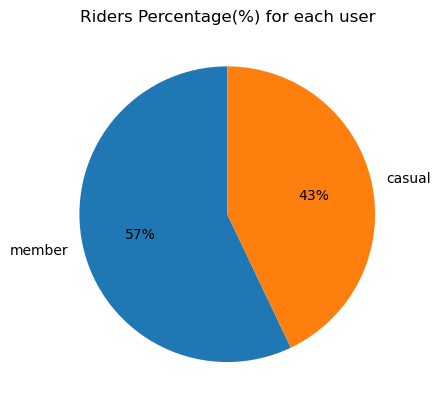

In [132]:
#count the riders given the user type 
plt.pie(count['count'],
        labels=count['member_casual'],
        autopct='%.0f%%',
        startangle=90,)
plt.title('Riders Percentage(%) for each user')

In [124]:
count_bt

,member_casual,rideable_type,count
0,casual,classic_bike,1023270
1,casual,docked_bike,258417
2,casual,electric_bike,420870
3,member,classic_bike,1716375
4,member,electric_bike,547290


Text(47.27158950617283, 0.5, 'No. of rides')

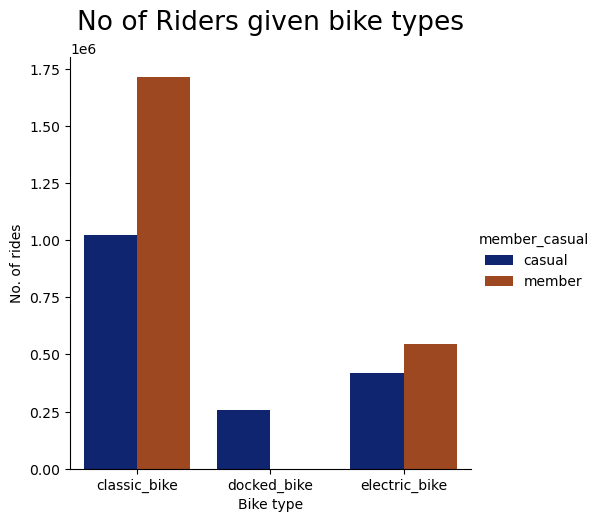

In [151]:
#Count the riders given both user and bike type 
sns.catplot(data=count_bt,
           kind='bar',
           x='rideable_type',
           y='count',
           hue='member_casual',
           palette='dark',
           orient='v')
plt.title('No of Riders given bike types',fontsize=19,pad=20)
plt.xlabel('Bike type')
plt.ylabel('No. of rides')

Docked bikes are never used by annual memebers for the past 12 months 

In [153]:
count_wd

,member_casual,weekday,count
0,casual,Friday,240018
1,casual,Monday,191801
2,casual,Saturday,386093
3,casual,Sunday,328667
4,casual,Thursday,189962
5,casual,Tuesday,176268
6,casual,Wenesday,189748
7,member,Friday,321910
8,member,Monday,309386
9,member,Saturday,306875


Text(52.67215895061727, 0.5, 'No. of Rides')

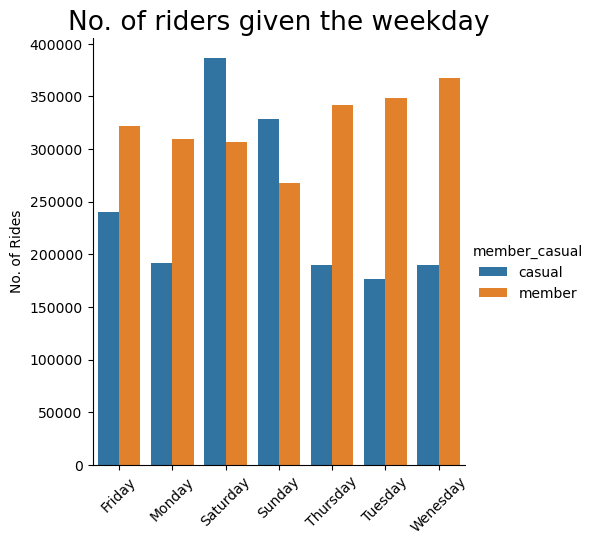

In [171]:
#Count of riders given both users and weekday 
sns.catplot(data=count_wd,
           kind='bar',
           x='weekday',
           y='count',
           hue='member_casual',
           capsize=400)
plt.xticks(rotation=45)
plt.title('No. of riders given the weekday',fontsize=19)
plt.xlabel('')
plt.ylabel('No. of Rides')

Casual users are active the most in weekends 

Members are more active thoughout the rest of the week 

In [174]:
avg_ride

,member_casual,weekday,Avg_duration_m
0,casual,Friday,31.28
1,casual,Monday,32.64
2,casual,Saturday,35.07
3,casual,Sunday,38.29
4,casual,Thursday,28.36
5,casual,Tuesday,28.56
6,casual,Wenesday,28.67
7,member,Friday,12.57
8,member,Monday,12.46
9,member,Saturday,14.45


Text(44.23027787422839, 0.5, 'Avg duration in min')

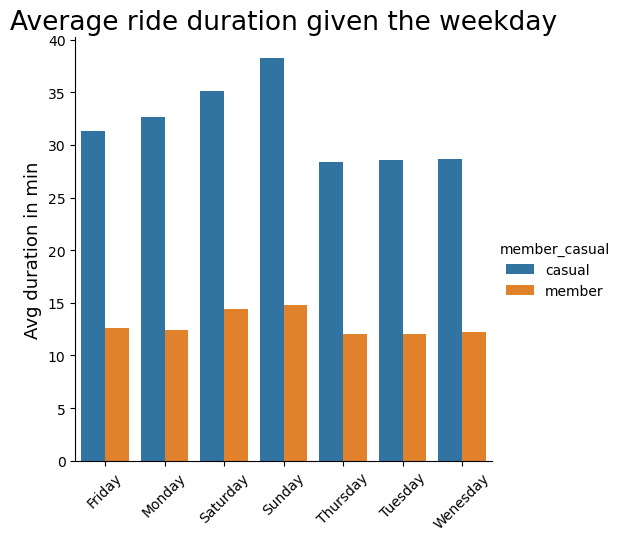

In [188]:
#Average ride duration given the user and weekday 
sns.catplot(data=avg_ride,
           kind='bar',
           x='weekday',
           y='Avg_duration_m',
           hue='member_casual')
plt.xticks(rotation=45)
plt.title('Average ride duration given the weekday',fontsize=19)
plt.xlabel('')
plt.ylabel('Avg duration in min',fontsize=13)

Average casual rides duration are twice the member duration over the entire weeek 

In [194]:
count_s

,member_casual,season,count
0,casual,Autum,551930
1,casual,Spring,404318
2,casual,Summer,673508
3,casual,Winter,72801
4,member,Autum,802841
5,member,Spring,560655
6,member,Summer,627387
7,member,Winter,272782


Text(52.67215895061727, 0.5, 'No. of rides')

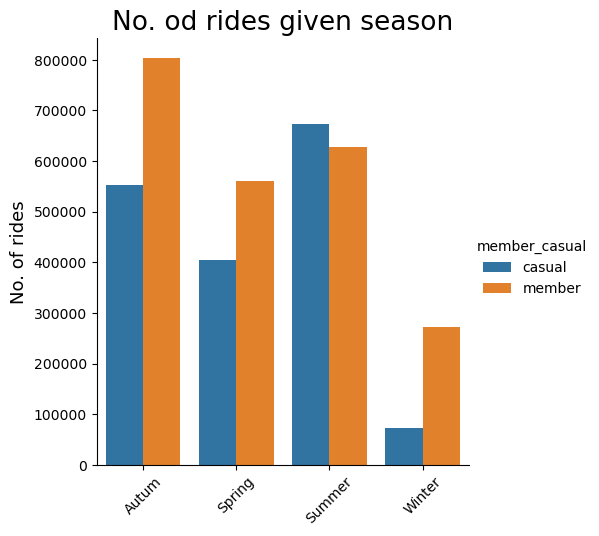

In [196]:
#Count of the rides given the users and the duration 
sns.catplot(data=count_s,
           kind='bar',
           x='season',
           y='count',
           hue='member_casual')
plt.xticks(rotation=45)
plt.title('No. od rides given season',fontsize=19)
plt.xlabel('')
plt.ylabel('No. of rides',fontsize=13)

Casual users are active the most during summer while member users are active in Autum.

Members are more active than casuals the rest of the year.